# The theory of the Atlantic Meridional Overturning Circulation (AMOC)

### By [Spencer Jones](http://pordlabs.ucsd.edu/csjones/)

Deep water is formed in the Labrador and Greenland seas (in the North Atlantic), in the Ross and Weddell seas, and around Antarctica. In order to satisfy volume conservation, this water must return to the surface somewhere: the volume transported by deep-water formation must equal the volume transported by upwelling. The simplest thing to do is to assume a uniform upwelling $w$ across the whole ocean, which has area $A=4 \times 10^{13} m^2$, and

$wA=Q_S\, , $

where $Q_s=15 \times 10^6 m^3/s$ is the total rate of deep-water formation, with units of volume/time.

## Munk's Abyssal Recipes

Recall that the advection-diffusion equations for a temperature $T$ and salinity $S$ are

$$ \frac{DT}{D t} =  \nabla \cdot (\kappa_T \nabla T )  - \frac{1}{\rho_0 c_p^0}\frac{\partial Q_{rad}}{\partial z} \, , $$
$$  \rho \frac{DS}{Dt} =  \nabla \cdot ( \rho \kappa_S \nabla S ) \, .$$

In the ocean, $\kappa_T$ and $\kappa_S$ usually refer to the turbulent diffusivity, not the molecular diffusivity. The turbulent diffusivity is the effective diffusivity of the ocean: it is larger than the molecular diffusivity because it includes the effects of small-scale turbulent motions, which ove temperature and sainity faster than the molecular diffusivity. Because these small-scale turbulent motions are controlled by the ocean conditions, the turbulent diffusivity cannot be measured in the lab. 

One of the biggest questions in physical oceanography is *__What is the effective vertical diffusivity of the ocean?__*

Far from the ocean surface, $Q_{rad}=0$, so assuming steady state and the Boussinesq approximation,

$$ \left(u\frac{ \partial T}{\partial x}+v\frac{ \partial T}{\partial y}+w\frac{ \partial T}{\partial z}\right) = \nabla \cdot (\kappa_T \nabla T ) \, , $$
$$\left(u\frac{ \partial S}{\partial x}+v\frac{ \partial S}{\partial y}+w\frac{ \partial S}{\partial z}\right) =  \nabla \cdot (\kappa_S \nabla S ) \, .$$

Munk (1966) hypothesized that the below 1000m the flow obeys the vertical advection-diffusion equation, i.e. we can neglect horizontal transports of temperature and salinity. We set $\kappa_S\approx \kappa_T \approx K_v$ as the vertical diffusivity, which we will assume is uniform over the whole ocean. 

\begin{equation*}
\begin{aligned}
w\frac{\partial T}{\partial z}=K_v \frac{\partial ^2 T}{\partial z^2} \, , \\
w\frac{\partial S}{\partial z}=K_v \frac{\partial ^2 S}{\partial z^2} \, .
\end{aligned}
\end{equation*}

The solutions to the advection-diffusion equations take the form:

\begin{equation*}
\begin{aligned}
T=T_0+T_1 e^{wz/K_v} \\
S=S_0+S_1 e^{wz/K_v}
\end{aligned}
\end{equation*}

Munk fitted temperature and salinity data from the central Pacific with these functions to estimate $K_v$. The central Pacific is a good place because it has low horizontal velocities in the deep ocean. We can do the same thing here with some temperature profiles near the equator:

In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import fsspec

url = "https://www.esrl.noaa.gov/psd/thredds/fileServer/Datasets/nodc.woa98/temperat/annual/otemp.raw1deg.nc"


with fsspec.open(url) as fp:
    ds = xr.open_dataset(fp).load()
ds

/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/coding/times.py:119: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/core/indexing.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason:

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, level: 33, time: 1)
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * level    (level) float32 0.0 10.0 20.0 30.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
  * time     (time) object 0001-01-01 00:00:00
Data variables:
    otemp    (time, level, lat, lon) float32 nan -1.528 nan nan ... nan nan nan
Attributes:
    title:          NODC World Ocean Atlas 1998
    history:        created February 2000 by Hoop
    platform:       Marine Analyses
    Conventions:    COARDS
    References:     https://www.psl.noaa.gov/data/gridded/data.nodc.woa98.html
    dataset_title:  NODC (Levitus) World Ocean Atlas 1998

In [2]:
T_profile = ds.otemp[0].sel(lon=slice(160, 170)).isel(lat=70).mean('lon')
T_profile

<xarray.DataArray 'otemp' (level: 33)>
array([27.28738  , 27.255503 , 27.205109 , 27.14207  , 26.84693  ,
       25.95462  , 24.929    , 23.725101 , 22.33022  , 19.35958  ,
       16.92775  , 15.16682  , 11.549769 ,  8.529009 ,  6.54656  ,
        5.4630704,  4.867266 ,  4.36547  ,  4.04791  ,  3.6824002,
        3.3990498,  3.14325  ,  2.9537334,  2.6543334,  2.3956   ,
        2.0864   ,  1.7397   ,  1.5811334,  1.4910334,  1.4452333,
        1.4083334,  1.4050666,  1.45     ], dtype=float32)
Coordinates:
    lat      float32 19.5
  * level    (level) float32 0.0 10.0 20.0 30.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
    time     object 0001-01-01 00:00:00

In [3]:
# Fit a function to the data
from scipy import optimize

def test_func(x, a, b, c):
    return a+b*np.exp(-x/c)

params, params_covariance = optimize.curve_fit(test_func, ds.level.values, T_profile.values,
                                               p0=[2, 2, 2])

print(params)

[  1.5203067   27.81977414 413.91147183]


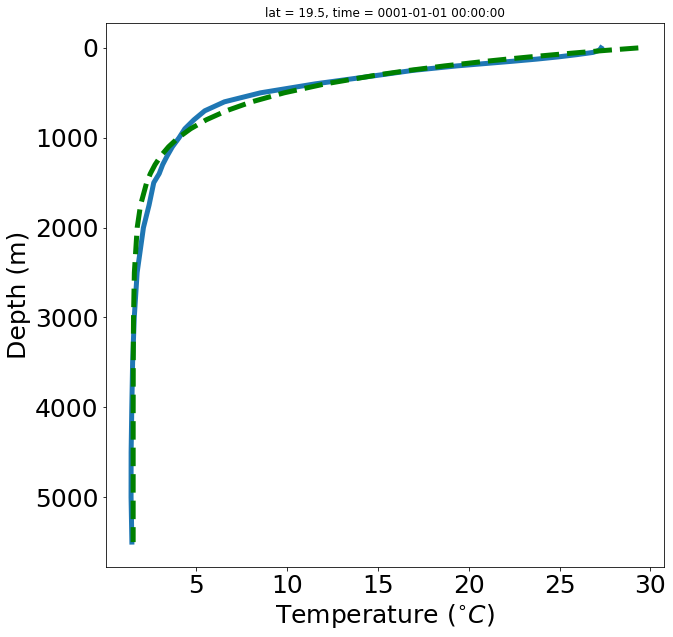

In [4]:
plt.figure(figsize=(10, 10))
T_profile.plot(y='level', yincrease=True, linewidth=5.0)
plt.plot(test_func(ds.level, *params),ds.level, 'g--', linewidth=5.0)
plt.gca().invert_yaxis()
plt.gca().tick_params('both',labelsize=25)
plt.ylabel('Depth (m)',fontsize=25)
plt.xlabel('Temperature ($^{\circ}C$)',fontsize=25);

Based on this temperature profile, 

\begin{equation*}
\frac{K_v}{w}=414m \, .
\end{equation*}

The rate of deep water formation is about $Q_s=15Sv=15 \times 10^6 m^3/s$ and the area of the oceans is about $A=4 \times 10^{13} m^2$, so $K_v \approx 1.5 \times 10^{-4}m^2/s$. This is close to Munk's answer of $K_v \approx 1.3 \times 10^{-4}m^2/s$.

According to Munk's recipe, the upwelling of deep waters is drive by downward diffusion of heat from the surface. 

## Stommel-Arons abyssal flows

Remember the planetary vorticity equation:

$$\frac{\partial \omega}{\partial t}-f \frac{\partial w}{\partial z}+ \beta v=\frac{1}{\rho_0}\frac{\partial}{\partial z}\left(\frac{-\partial \tau_x}{\partial y}+\frac{\partial \tau_y}{\partial x}\right)$$

In the interior of the deep ocean, we are away from boundaries so $\tau_x=\tau_y=0$. We assume that the flow is in steady state, so

\begin{equation*}
f\frac{\partial w}{\partial z} = \beta v \, .
\end{equation*}

This is a form of Sverdrup balance: the left side represents vortex stretching and $\beta v$ represents the production of vorticity due to advection across the planetary vorticity gradient. The upwelling stretches the bottom part of the water column, which must move poleward in order to conserve potential vorticity.  

Now we can solve for the meridional flow by dividing by $\beta$ and integrating between the bottom, $z=-H$, and a point in the interior below the wind-driven flow, $z=z_I$:

\begin{equation*}
\int_{z=-H}^{z=z_I} v dz=\frac{f}{\beta} \left(w|_{z=z_I} -w|_{z=-H}\right)
\end{equation*}

$w|_{z=z_I}$ is the vertical velocity in the interior, which is $Q_s/A$. $w|_{z=-H}$ is the vertical velocity at the bottom of the ocean, which is zero. So,

\begin{equation*}
V=\frac{f Q_s}{\beta A} \, .
\end{equation*}

Here, $V$ is the depth integrated meridional velocity in the deep ocean, which I've plotted below.

In [5]:
url = "http://research.jisao.washington.edu/datasets/elevation/fractional_land.1-deg.nc"
with fsspec.open(url) as fp:
    ds_land = xr.open_dataset(fp, decode_times=False).load()

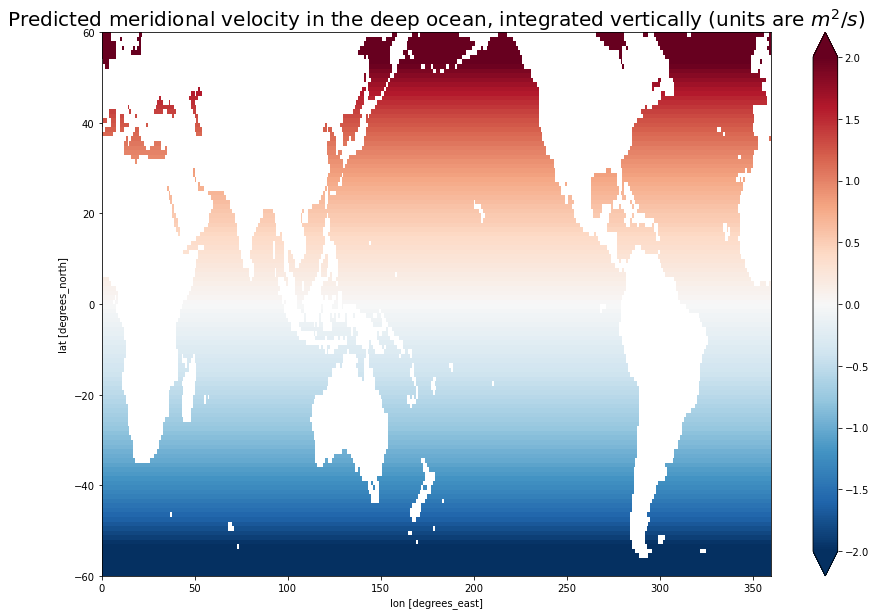

In [6]:
V=ds_land.data+4*10**6*np.tan(np.deg2rad(ds.lat))*15*10**6/4/10**13
V.where(ds_land.data==0).plot(vmin=-2,vmax=2, aspect=1.5,size=10, cmap='RdBu_r')
plt.ylim(-60,60) 
plt.title('Predicted meridional velocity in the deep ocean, integrated vertically (units are $m^2/s$)',fontsize=20);

$f$ is positive in the northern hemisphere and negative in the southern hemisphere, so $V$ is northward in the northern hemisphere and southward in the southern hemisphere. 

How do we find the zonal velocity? This flow is not barotropic, so we can't just make a streamfunction. Instead, we can assume geostrophic balance:

$$-fv_g=-\frac{\partial \phi}{\partial x}$$
$$fu_g=-\frac{\partial \phi}{\partial y}$$
where $\phi$ is the dynamic pressure. Hence, 
$$-fV=\int_{-H}^{z_I} \frac{\partial \phi}{\partial x} \, dz$$
$$fU=\int_{-H}^{z_I}\frac{\partial \phi}{\partial y} \, dz$$

Assuming there is no flow on the eastern boundary, we can set $\phi=$const on the eastern boundary of the basin, $x=x_e$, we can integrate $V$ to find
$$\int_{-H}^{z_I}\phi \, dz =\frac{f^2 Q_s}{\beta A}(x-x_e)\, , $$ 
and then differentiate with respect to $y$ to get
$$U=\frac{1}{f}\frac{\partial}{\partial y}\int_{-H}^{z_I} \phi \, dz =\frac{1}{f}\frac{2 \beta f Q_s}{\beta A}(x-x_e)=\frac{2 Q_s}{A}(x-x_e)\, . $$ 

Sometimes $V$ is towards a source of deep water. As in the upper ocean, volume must be conserved, which is enabled by **western boundary currents**.

### Single Hemisphere example

So for example, upwelling in the Northern Hemisphere of the Atlantic Ocean is associated with northward flow in the interior of the deep ocean. But there is a source of deep water in the far north of the Atlantic, so the net transport at depth must be southward. Therefore a southward western boundary current transports the water from the source of deep water *and* the water that flowed north in the interior southward towards the equator.

If we think about a box that represents the North Atlantic and assume no flow crosses the equator (this isn't realistic but it makes a nice example):

![Stommel_arons_box.001.jpeg](images/Stommel_arons_box.001.jpeg)
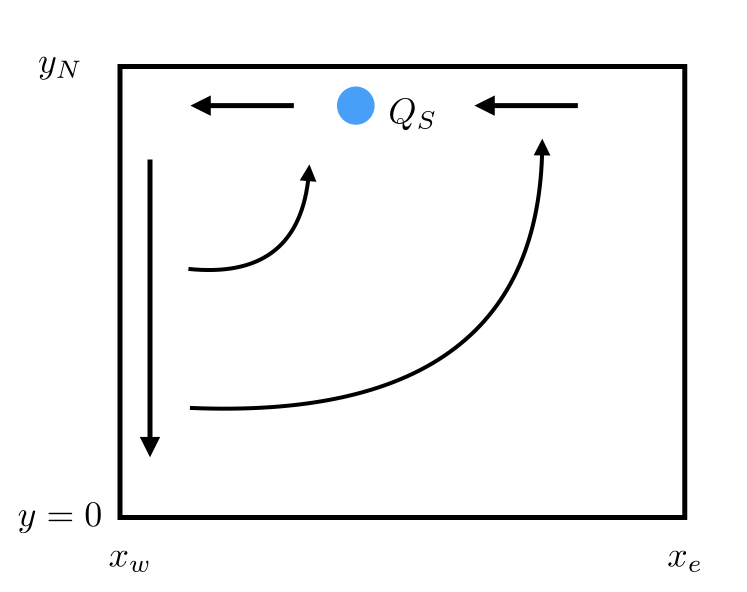

By conservation of mass, the amount of deep-water formation, $Q_s$, plus the northward transport in the interior, $Q_I$, must equal the transport removed by upwelling, $Q_u$, plus the transport of the western boundary current:
$$Q_s+Q_I(y)=Q_W(y)+Q_u(y)$$

By integrating $V$ in the zonal direction, 
$$Q_I(y)=\int_{x_w}^{x_e}V \, dx = \frac{f Q_s}{\beta A}(x_e-x_w) \, . $$

The upwelling lost is given by
$$Q_u(y)=\int_{x_w}^{x_e}\int_y^{y_N}w \, dy \, dx=\frac{Q_s}{A}(x_e-x_w)(y_N-y) \, . $$

Hence, we can find the transport of the western boundary current, 
$$Q_W(y)=Q_s+Q_I-Q_u=Q_s+\frac{f Q_s}{\beta A}(x_e-x_w)-\frac{Q_s}{A}(x_e-x_w)(y_N-y) \, .$$

If the area over which upwelling occurs is $A=(x_e-x_w)y_N$,
$$Q_W(y)=\frac{Q_s}{y_N}\left(\frac{f}{\beta}+y\right)$$

Using the $\beta$-plane approximation $f=f_0+\beta y$, and taking $f_0=0$,
$$Q_W(y)=2 Q_S\frac{y}{y_N}$$

In this simplified example, the maximum transport of the western boundary current is twice the rate of deep-water formation. 

### Stommel-Arons in a global geometry

Sources of deep water are marked $S_1$ and $S_2$ in the figure below (from Stommel and Arons' 1959 paper). Here, water can cross the equator. Remember that this figure assumes uniform upwelling of deep waters. 



![stommel_arons.jpg](images/stommel_arons.jpg)
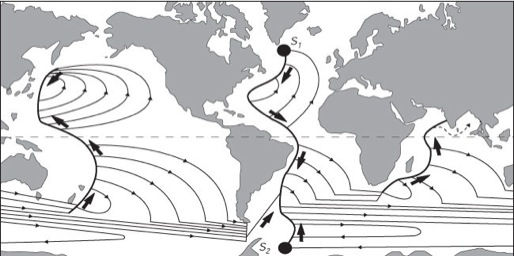

One feature of the solution is a deep western boundary current that flows southward in the Atlantic Ocean. This is consistent with observations. For example, high oxygen water is formed in the North Atlantic and flows southward in the deep western boundary current:

![gam2810_oxy.jpg](images/gam2810_oxy.jpg)
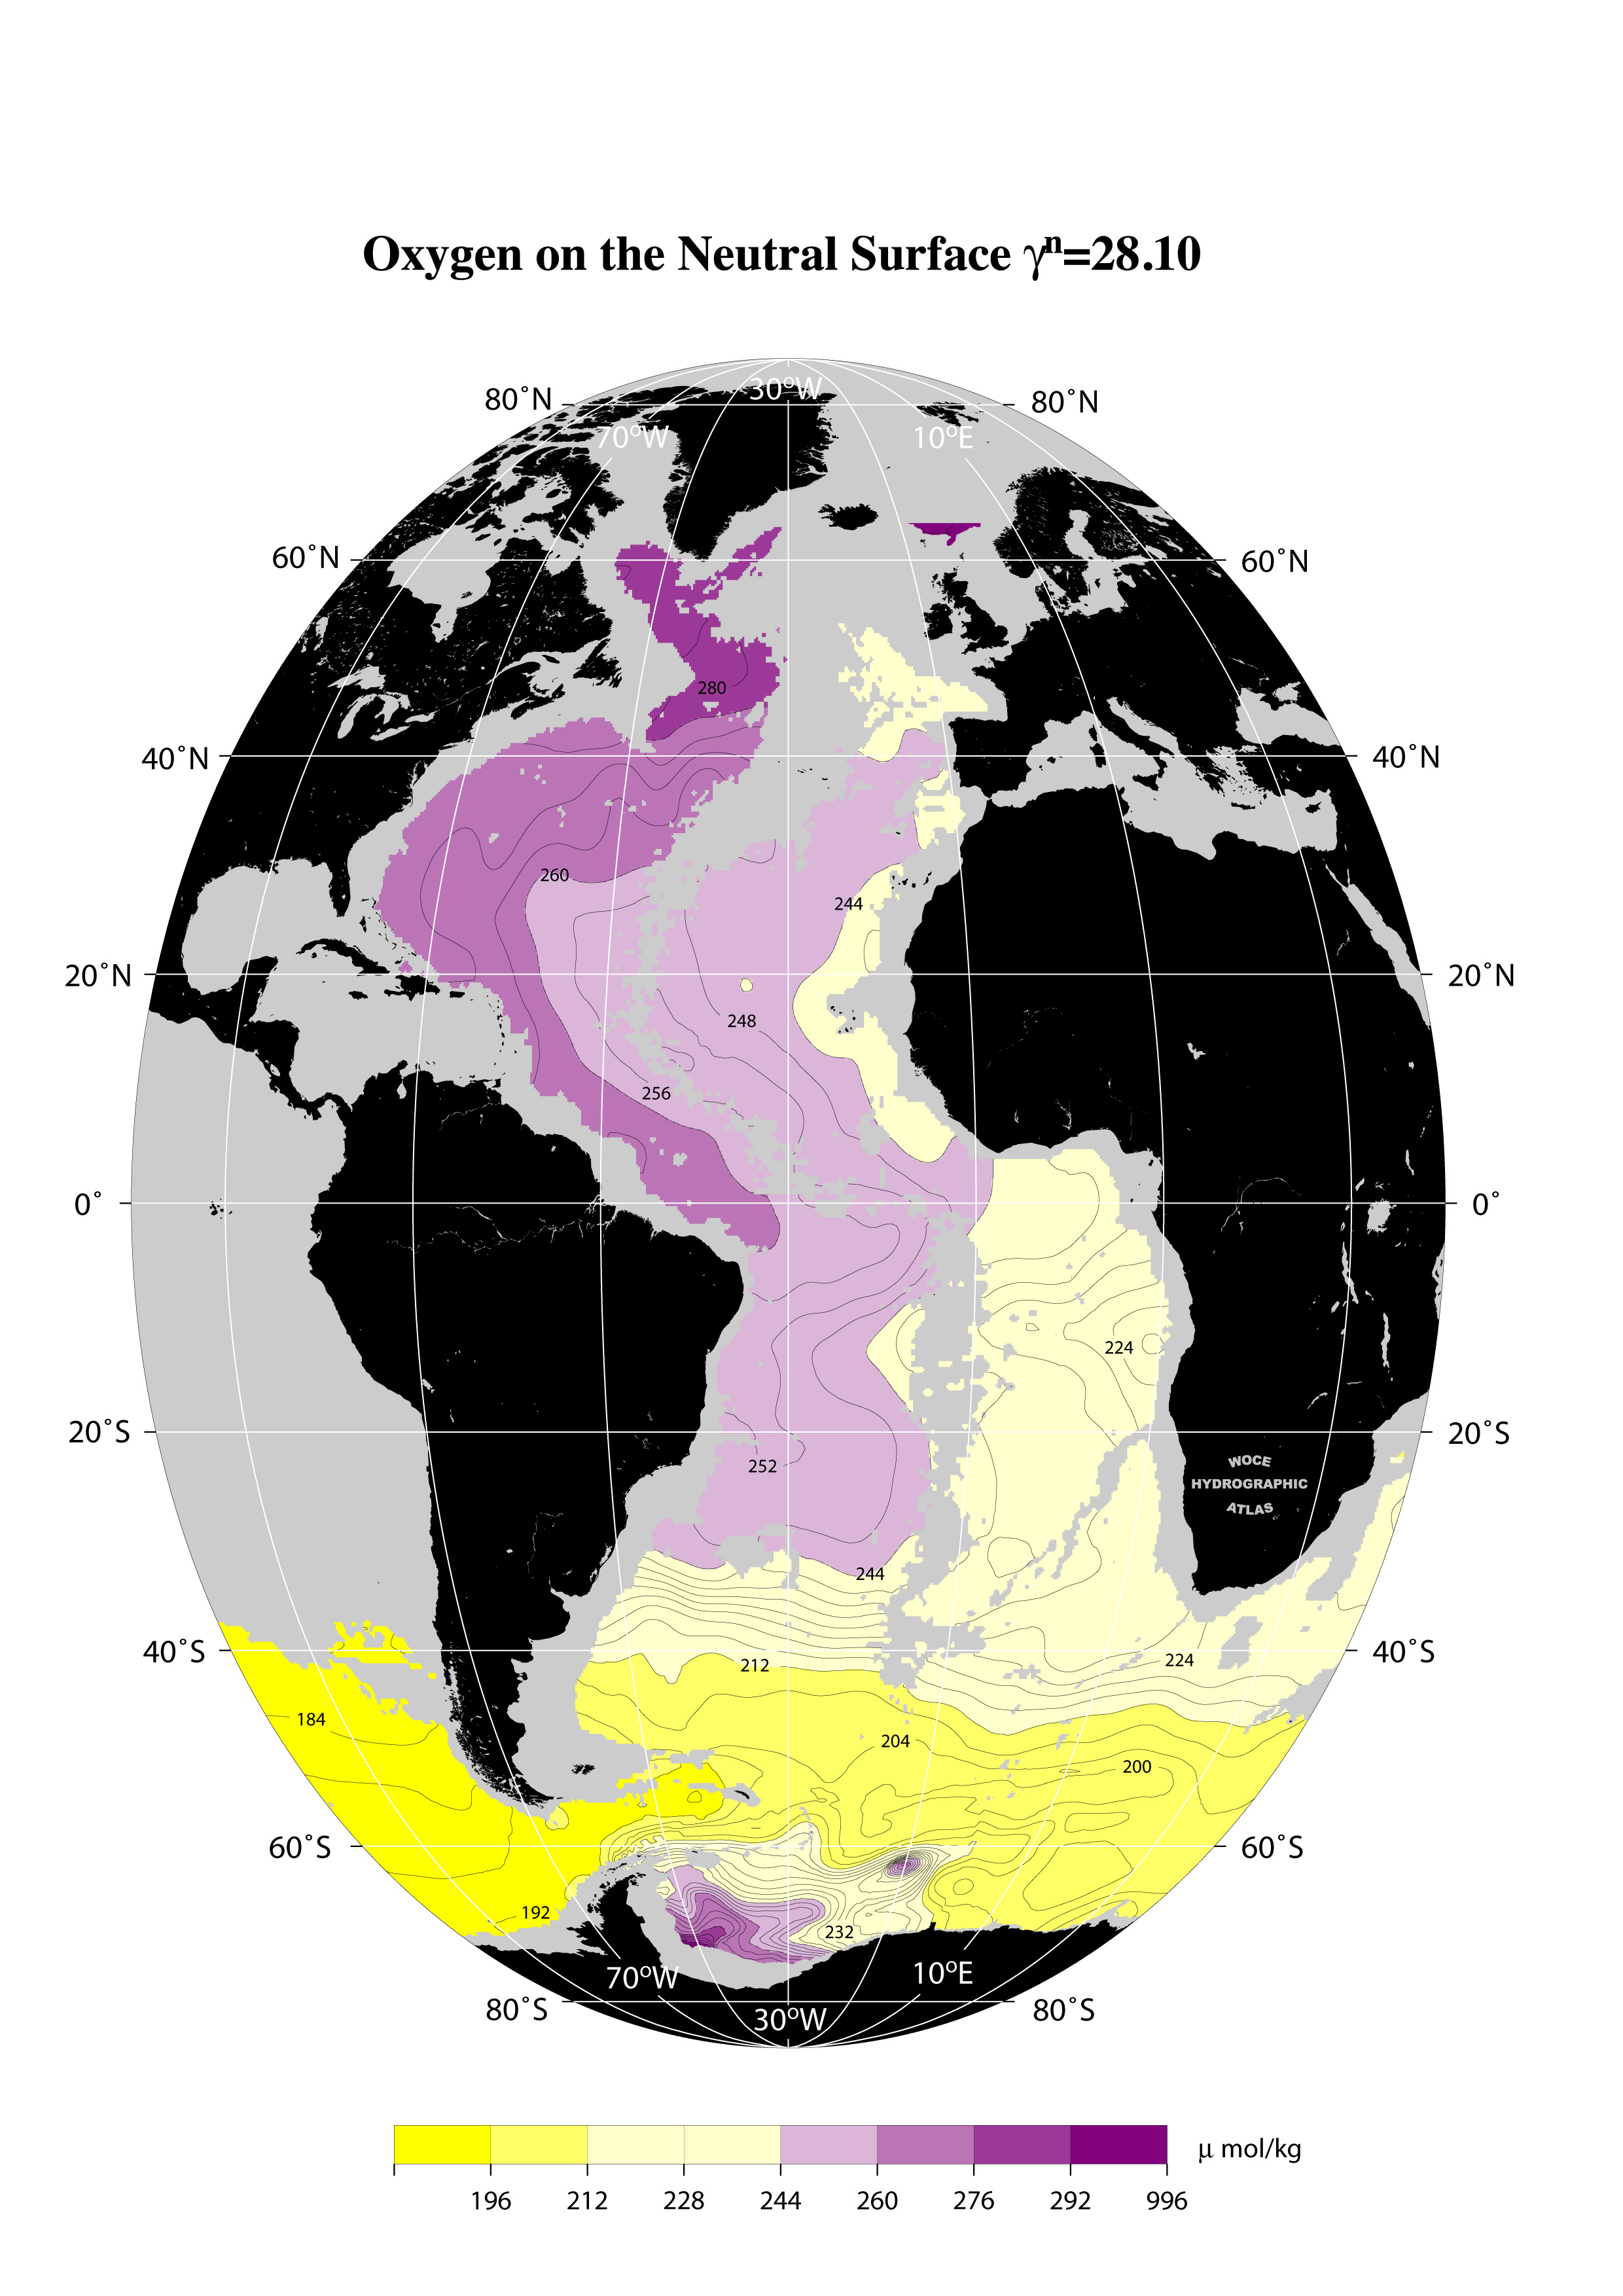